<a href="https://colab.research.google.com/github/Ayonator77/Scientific-Computing/blob/main/m451p2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from sympy import *
import matplotlib.pyplot as plt

In [ ]:
def triDyGuy(a, b, c, d):
  '''Funtion that takes a tridiagonal matrix A with diaganoals a, b, and c
  where a is the sub diagonal, b is the true diagonal, and c is the super
  diagonal. Vector d is the constant vector. These are used to compute and
  return the solution vector x in from the form Ax = b'''
  n = len(d) # number of equations or rank of matrix
  a, b = map(np.array, a.astype(float), b.astype(float)) # prepare arrays
  c, d = map(np.array, c.astype(float), d.astype(float)) # prepare arrays
  for i in range(1, n):
    xi = a[i-1] / b[i-1]
    b[i] = b[i] - xi*c[i-1]
    d[i] = d[i] - xi*d[i-1]
  x = b
  x[-1] = d[-1] / b[-1]
  for i in range(n-2, -1, -1):
    x[i] = (d[i] - c[i]*x[i+1])/ b[i]
  return x

In [ ]:
A = np.array([[-2,1,0,0,0],
              [1,-2,1,0,0],
              [0,1,-2,1,0],
              [0,0,1,-2,1],
              [0,0,0,1,-1]], dtype=float)
ev, evec = np.linalg.eig(A) # unpacks into eigenvalues, eigenvectors
print(ev, '\n')
print(evec)

[-3.68250707 -2.83083003 -1.71537032 -0.69027853 -0.08101405] 

[[-0.32601868 -0.54852873  0.59688479 -0.45573414  0.16989112]
 [ 0.54852873  0.45573414  0.16989112 -0.59688479  0.32601868]
 [-0.59688479  0.16989112 -0.54852873 -0.32601868  0.45573414]
 [ 0.45573414 -0.59688479 -0.32601868  0.16989112  0.54852873]
 [-0.16989112  0.32601868  0.45573414  0.54852873  0.59688479]]


In [ ]:
def superNewton(f, x0, e=1e-10):
  iterations = [x0]
  x = symbols('x')
  f_prime = lambdify(x, diff(f(x), x))
  while True:
    if f_prime(x0) == 0:
      raise ValueError('You messed up.')
    x1 = float(x0 - (f(x0) / f_prime(x0)))
    x0 = x1
    iterations.append(x0)
    if abs(f(x0)) < e:
      break
  return x0, iterations

In [ ]:
def getCharPoly(subd, d, n):
  '''This function takes the  subdiagonal and diagonal of the hermetian
  matrix and computes the characteristic polynomial implementing the
  recursive formula from part 1. n is the rank of the hermetian matrix.
  This function returns a factored sympy polynomial expression'''
  x = symbols('x')
  subd, d = subd.astype(float), d.astype(float)
  if n == 1:
    p = (d[0] - x)
    return p
  elif n == 2:
    p = (d[1] - x)*(d[0] - x) - abs(subd[0]**2)
    return p
  else:
    a = (d[n-1] - x)*getCharPoly(subd, d, n-1)
    p = a - abs(subd[n-2]**2)*subd[n-3]*getCharPoly(subd, d, n-2)
    return factor(p)

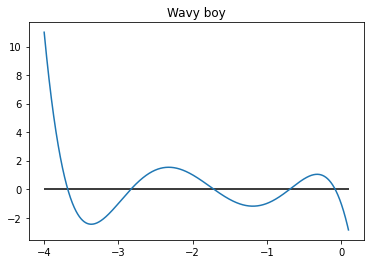

In [ ]:
x = symbols('x')
subd = np.array([1,1,1,1])
d = np.array([-2,-2,-2,-2,-1])

f = getCharPoly(subd, d, 5)
#print("the characteristic polynomial is:", f)
#print("latex", latex(f))
# these two lines of code use newton's method to find the roots of the
# charicteristic polynomial and add the roots to teh foundEVS list
f = lambdify(x, f, 'numpy')
#a, b = superNewton(f, -2.5)
#foundEVS = [-0.08101405277100507, -0.6902785321094295, -3.682507065662369, -1.715370323453437, -2.8308300260037758]
#foundEVS.sort()
#print("Devon's homemade Eigenvalues are:\n\t", foundEVS)
#print("Numpy's calculated Eigenvalues:\n\t", ev)
xr = np.arange(-4, .1, .001)
plt.plot(xr, f(xr))
plt.hlines(0, -4, .1, colors='black')
plt.title("Wavy boy")
plt.show()